**Table of contents**<a id='toc0_'></a>    
- [Data Import and Cleaning](#toc1_)    
- [Exploratory Data Analysis](#toc2_)    
  - [Survival rate](#toc2_1_)    
  - [Crashes and fatalities trends over time](#toc2_2_)    
  - [Fatalities for specific airline operators](#toc2_3_)    
  - [Crash patterns by aircraft type](#toc2_4_)    
  - [Commercial vs Military incidents trend](#toc2_5_)    
- [Hypothesis Test](#toc3_)    
- [Conclusion](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Import and Cleaning](#toc0_)

In [2]:
!kaggle datasets download -d nayansubedi1/airplane-crashes-and-fatalities-upto-2023 --unzip

Dataset URL: https://www.kaggle.com/datasets/nayansubedi1/airplane-crashes-and-fatalities-upto-2023
License(s): DbCL-1.0




  0%|          | 0.00/624k [00:00<?, ?B/s]
100%|██████████| 624k/624k [00:00<00:00, 706kB/s]
100%|██████████| 624k/624k [00:00<00:00, 706kB/s]


In [3]:
import pandas as pd

data = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='ISO-8859-1')
data.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [5]:
# Converting the 'Date' column to a proper datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

missing_data_summary = data.isnull().sum()

missing_data_summary


Date                        0
Time                     1512
Location                    4
Operator                   10
Flight #                 3669
Route                     777
AC Type                    15
Registration              274
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     42
Summary                    64
dtype: int64

We will do the following:
1. Drop columns with excessive missing data that aren't essential for our analysis (like Flight #, Registration, cn/ln).
2. Fill missing values in important columns (Aboard, Fatalities, Ground) with appropriate methods (such as the median or mean for numeric columns).

In [6]:
# Dropping columns that are not critical for our analysis
data_cleaned = data.drop(columns=['Flight #', 'Registration', 'cn/ln'])

# For columns related to aboard and fatalities, we will fill missing values with the median since these are numeric.
columns_to_fill = ['Aboard', 'Aboard Passangers', 'Aboard Crew', 'Fatalities', 'Fatalities Passangers', 'Fatalities Crew', 'Ground']
for column in columns_to_fill:
    data_cleaned[column] = data_cleaned[column].fillna(data_cleaned[column].median())

# <a id='toc2_'></a>[Exploratory Data Analysis](#toc0_)

## <a id='toc2_1_'></a>[Survival rate](#toc0_)

In [7]:
# Calculating total crashes, total fatalities, and survival rates
total_crashes = data_cleaned.shape[0]
total_fatalities = data_cleaned['Fatalities'].sum()
total_aboard = data_cleaned['Aboard'].sum()
survival_rate = (total_aboard - total_fatalities) / total_aboard * 100

# Grouping data by year to explore crash trends over time
data_cleaned['Year'] = data_cleaned['Date'].dt.year
crashes_per_year = data_cleaned.groupby('Year').size()
fatalities_per_year = data_cleaned.groupby('Year')['Fatalities'].sum()

# Displaying the results of EDA
summary_stats = {
    'Total Crashes': total_crashes,
    'Total Fatalities': total_fatalities,
    'Total Aboard': total_aboard,
    'Survival Rate (%)': survival_rate
}

summary_stats, crashes_per_year.head(), fatalities_per_year.head()


({'Total Crashes': 4998,
  'Total Fatalities': 111732.0,
  'Total Aboard': 155644.0,
  'Survival Rate (%)': 28.21310169360849},
 Year
 1908    1
 1909    1
 1912    1
 1913    3
 1915    2
 dtype: int64,
 Year
 1908     1.0
 1909     1.0
 1912     5.0
 1913    45.0
 1915    40.0
 Name: Fatalities, dtype: float64)

## <a id='toc2_2_'></a>[Crashes and fatalities trends over time](#toc0_)

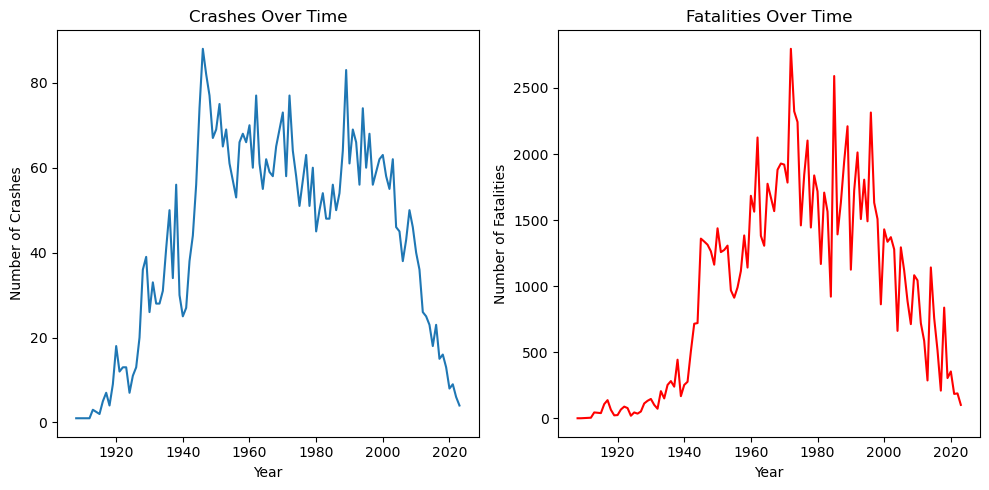

In [8]:
import matplotlib.pyplot as plt

# Plotting the trend of crashes and fatalities over the years
plt.figure(figsize=(10, 5))

# Crashes per year
plt.subplot(1, 2, 1)
plt.plot(crashes_per_year.index, crashes_per_year.values, label='Crashes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.title('Crashes Over Time')

# Fatalities per year
plt.subplot(1, 2, 2)
plt.plot(fatalities_per_year.index, fatalities_per_year.values, color='red', label='Fatalities per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.title('Fatalities Over Time')

plt.tight_layout()
plt.show()


## <a id='toc2_3_'></a>[Fatalities for specific airline operators](#toc0_)

In [22]:
# Grouping crashes and fatalities by airline operators
fatalities_by_operator = data_cleaned.groupby('Operator')['Fatalities'].sum()

# Sorting operators by total fatalities in descending order
top_operators_by_fatalities = fatalities_by_operator.sort_values(ascending=False).head(10)

# Displaying the top 10 operators by total fatalities
top_operators_by_fatalities


Operator
Aeroflot                           8858.0
Military - U.S. Air Force          3356.0
Air France                         1757.0
American Airlines                  1422.0
Pan American World Airways         1303.0
Military - U.S. Army Air Forces    1070.0
United Air Lines                   1019.0
AVIANCA                             941.0
Turkish Airlines (THY)              890.0
Indian Airlines                     860.0
Name: Fatalities, dtype: float64

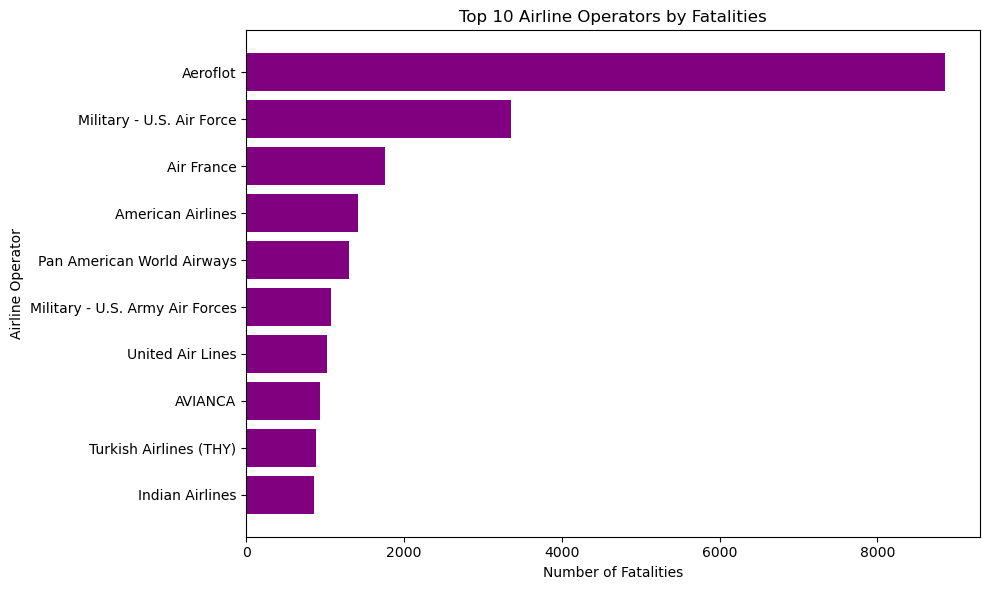

In [23]:
# Visualizing the top 10 airline operators by fatalities

plt.figure(figsize=(10, 6))
plt.barh(top_operators_by_fatalities.index, top_operators_by_fatalities.values, color='purple')
plt.xlabel('Number of Fatalities')
plt.ylabel('Airline Operator')
plt.title('Top 10 Airline Operators by Fatalities')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.tight_layout()
plt.show()


## <a id='toc2_4_'></a>[Crash patterns by aircraft type](#toc0_)

In [24]:
crashes_by_aircraft_type = data_cleaned.groupby('AC Type').size()
fatalities_by_aircraft_type = data_cleaned.groupby('AC Type')['Fatalities'].sum()

top_aircraft_types_by_crashes = crashes_by_aircraft_type.sort_values(ascending=False).head(10)
top_aircraft_types_by_fatalities = fatalities_by_aircraft_type.sort_values(ascending=False).head(10)

top_aircraft_types_by_crashes, top_aircraft_types_by_fatalities


(AC Type
 Douglas DC-3                                333
 de Havilland Canada DHC-6 Twin Otter 300     82
 Douglas C-47A                                70
 Douglas C-47                                 64
 Douglas DC-4                                 38
 Yakovlev YAK-40                              35
 Antonov AN-26                                35
 Junkers JU-52/3m                             31
 De Havilland DH-4                            27
 Douglas DC-6B                                27
 dtype: int64,
 AC Type
 Douglas DC-3                                4734.0
 Douglas C-47                                1069.0
 Douglas DC-6B                               1051.0
 Antonov AN-26                               1038.0
 Ilyushin IL-18B                             1008.0
 McDonnell Douglas DC-9-32                    953.0
 Douglas DC-4                                 891.0
 de Havilland Canada DHC-6 Twin Otter 300     832.0
 Tupolev TU-134A                              807.0
 McDonnel

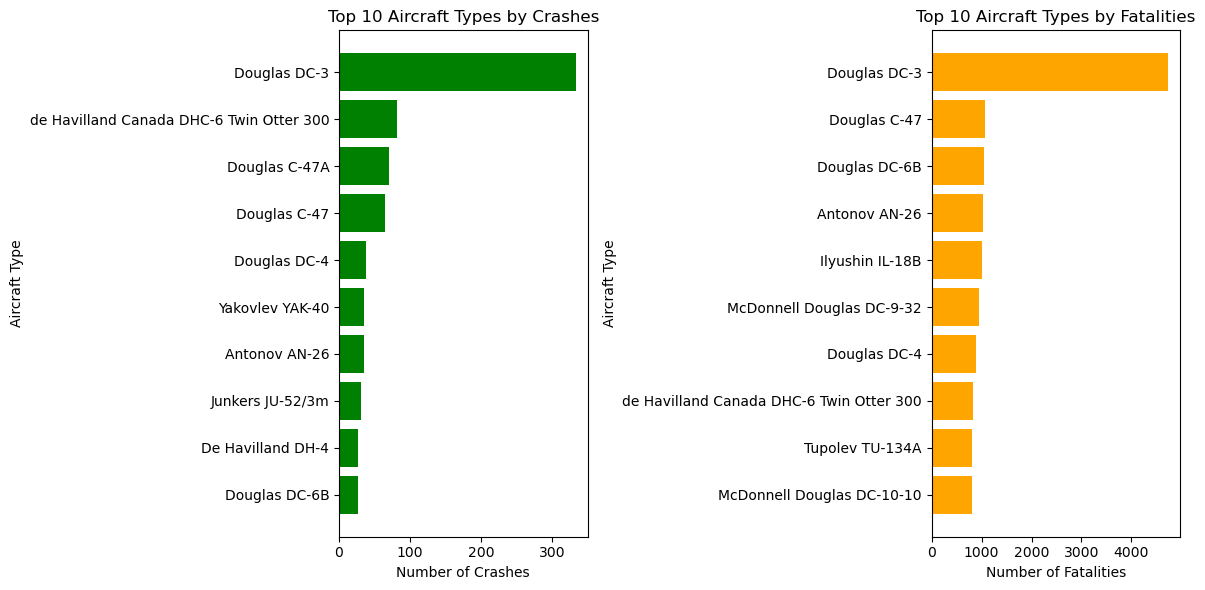

In [25]:
# Visualizing the top 10 aircraft types by crashes and fatalities

plt.figure(figsize=(12, 6))

# Bar plot for crashes by aircraft type
plt.subplot(1, 2, 1)
plt.barh(top_aircraft_types_by_crashes.index, top_aircraft_types_by_crashes.values, color='green')
plt.xlabel('Number of Crashes')
plt.ylabel('Aircraft Type')
plt.title('Top 10 Aircraft Types by Crashes')
plt.gca().invert_yaxis()

# Bar plot for fatalities by aircraft type
plt.subplot(1, 2, 2)
plt.barh(top_aircraft_types_by_fatalities.index, top_aircraft_types_by_fatalities.values, color='orange')
plt.xlabel('Number of Fatalities')
plt.ylabel('Aircraft Type')
plt.title('Top 10 Aircraft Types by Fatalities')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


Douglas DC-3 stands out both in terms of crashes and fatalities, indicating its significant presence in aviation history.

Other aircraft types such as the Douglas C-47, Antonov AN-26, and McDonnell Douglas DC-6B also have high fatalities.

## <a id='toc2_5_'></a>[Commercial vs Military incidents trend](#toc0_)

In [33]:
data_cleaned['Operator'].value_counts()[:50]

Operator
Aeroflot                                  255
Military - U.S. Air Force                 140
Air France                                 72
Deutsche Lufthansa                         63
United Air Lines                           44
China National Aviation Corporation        43
Military - U.S. Army Air Forces            43
Pan American World Airways                 41
American Airlines                          37
US Aerial Mail Service                     35
KLM Royal Dutch Airlines                   34
Indian Airlines                            34
Philippine Air Lines                       33
Military - Royal Air Force                 32
Private                                    31
British Overseas Airways                   29
Military - U.S. Navy                       29
Military - U.S. Army                       27
Northwest Orient Airlines                  25
Eastern Air Lines                          25
AVIANCA                                    24
Aeropostale              

In [27]:
# Creating a function to classify operators as military or commercial
def classify_operator(operator):
    operator = str(operator).lower()
    if 'military' in operator or 'air force' in operator or 'navy' in operator or 'army' in operator:
        return 'Military'
    else:
        return 'Commercial'

# Applying the function to classify each crash as either military or commercial
data_cleaned['Operator Type'] = data_cleaned['Operator'].apply(classify_operator)

# Grouping data by the new 'Operator Type' column
crashes_by_operator_type = data_cleaned.groupby('Operator Type').size()
fatalities_by_operator_type = data_cleaned.groupby('Operator Type')['Fatalities'].sum()

# Display the number of crashes and fatalities for military vs commercial
crashes_by_operator_type, fatalities_by_operator_type


(Operator Type
 Commercial    4217
 Military       781
 dtype: int64,
 Operator Type
 Commercial    90928.0
 Military      20804.0
 Name: Fatalities, dtype: float64)

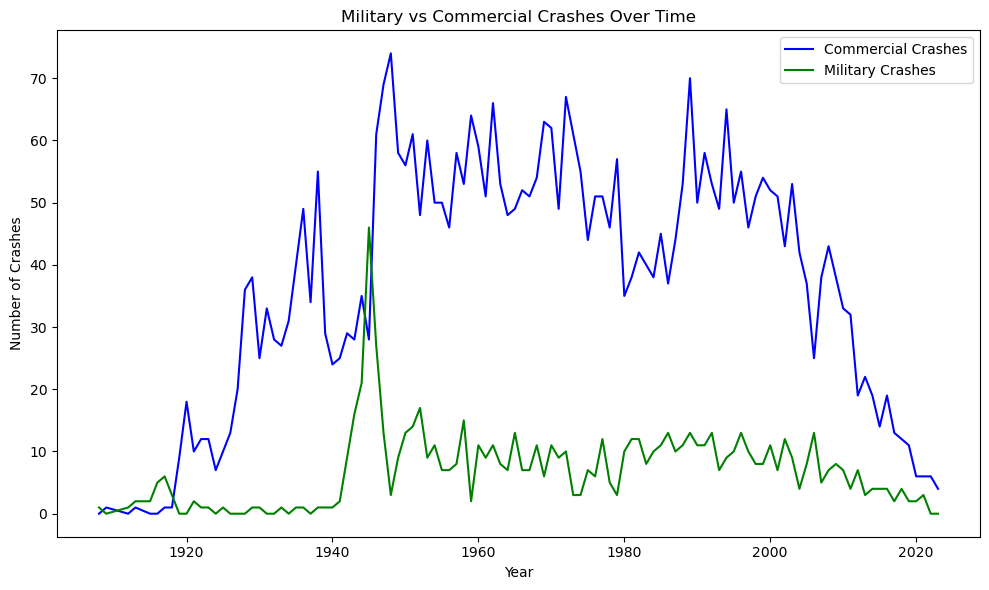

In [28]:
# Grouping data by year and operator type to analyze the crashes over time for military and commercial
crashes_by_year_operator = data_cleaned.groupby(['Year', 'Operator Type']).size().unstack(fill_value=0)

# Plotting the crash trends over time for both military and commercial operators
plt.figure(figsize=(10, 6))
plt.plot(crashes_by_year_operator.index, crashes_by_year_operator['Commercial'], label='Commercial Crashes', color='blue')
plt.plot(crashes_by_year_operator.index, crashes_by_year_operator['Military'], label='Military Crashes', color='green')

plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.title('Military vs Commercial Crashes Over Time')
plt.legend()
plt.tight_layout()
plt.show()


Commercial Crashes show a gradual increase with peaks during certain periods, likely reflecting the growth of commercial aviation.

Military Crashes have distinct peaks, potentially corresponding to major conflicts or periods of intense military activity.

## Survival rate by operator type

In [34]:


# Grouping by 'Operator Type' to get total aboard and fatalities
total_aboard_by_operator_type = data_cleaned.groupby('Operator Type')['Aboard'].sum()
total_fatalities_by_operator_type = data_cleaned.groupby('Operator Type')['Fatalities'].sum()

# Calculating the survival rate for both types
survival_rate_by_operator_type = (total_aboard_by_operator_type - total_fatalities_by_operator_type) / total_aboard_by_operator_type * 100

# Display the survival rates for commercial and military crashes
survival_rate_by_operator_type


Operator Type
Commercial    31.608400
Military       8.320113
dtype: float64

# <a id='toc3_'></a>[Hypothesis Test](#toc0_)

- Null Hypothesis (H0): There is no significant difference in the average number of fatalities across different decades.
- Alternative Hypothesis (H1): There is a significant difference in the average number of fatalities across different decades.

We will use ANOVA to test hypothesis since it's the most suitable for comparing multiple groups.

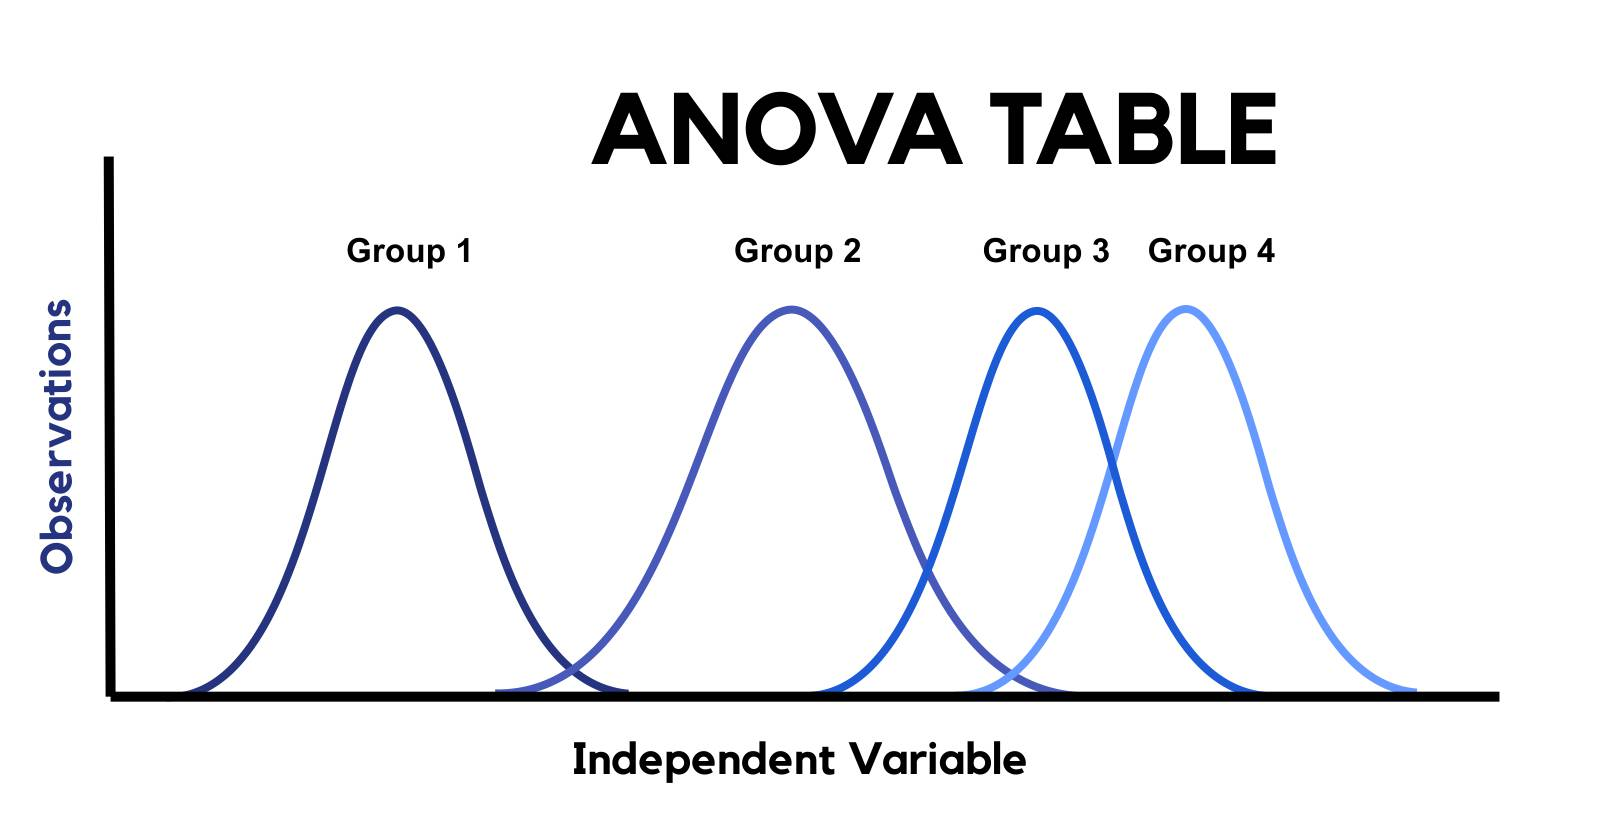

In [9]:
from scipy import stats
import numpy as np

# Create a new column 'Decade' by grouping the years into decades
data_cleaned['Decade'] = (data_cleaned['Year'] // 10) * 10

# Grouping the data by decade and extracting the number of fatalities per decade
decade_groups = data_cleaned.groupby('Decade')['Fatalities'].apply(list)

# Perform ANOVA to test if there's a significant difference in the mean number of fatalities across decades
f_stat, p_value = stats.f_oneway(*decade_groups)

# Displaying the F-statistic and p-value from the ANOVA test
f_stat, p_value


(23.294115469404762, 3.0858300848427796e-51)

In [10]:
decade_groups

Decade
1900                                           [1.0, 1.0]
1910    [5.0, 1.0, 14.0, 30.0, 21.0, 19.0, 20.0, 22.0,...
1920    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
1930    [1.0, 3.0, 16.0, 2.0, 5.0, 1.0, 2.0, 4.0, 3.0,...
1940    [8.0, 10.0, 11.0, 8.0, 14.0, 5.0, 5.0, 9.0, 1....
1950    [19.0, 16.0, 32.0, 14.0, 4.0, 44.0, 7.0, 5.0, ...
1960    [9.0, 34.0, 10.0, 50.0, 42.0, 37.0, 9.0, 59.0,...
1970    [5.0, 23.0, 32.0, 28.0, 1.0, 18.0, 34.0, 9.0, ...
1980    [9.0, 2.0, 7.0, 128.0, 13.0, 43.0, 1.0, 6.0, 1...
1990    [9.0, 27.0, 23.0, 1.0, 25.0, 19.0, 73.0, 30.0,...
2000    [1.0, 10.0, 22.0, 5.0, 169.0, 88.0, 8.0, 3.0, ...
2010    [2.0, 90.0, 2.0, 8.0, 11.0, 96.0, 10.0, 5.0, 3...
2020    [18.0, 176.0, 3.0, 8.0, 97.0, 20.0, 7.0, 26.0,...
Name: Fatalities, dtype: object

The results of the ANOVA test show the following:

- F-statistic: 23.29
- P-value: 3.08e-51

Since the p-value is significantly lower than the typical significance level of 0.05, we reject the null hypothesis. This indicates that there is a statistically significant difference in the average number of fatalities across different decades.

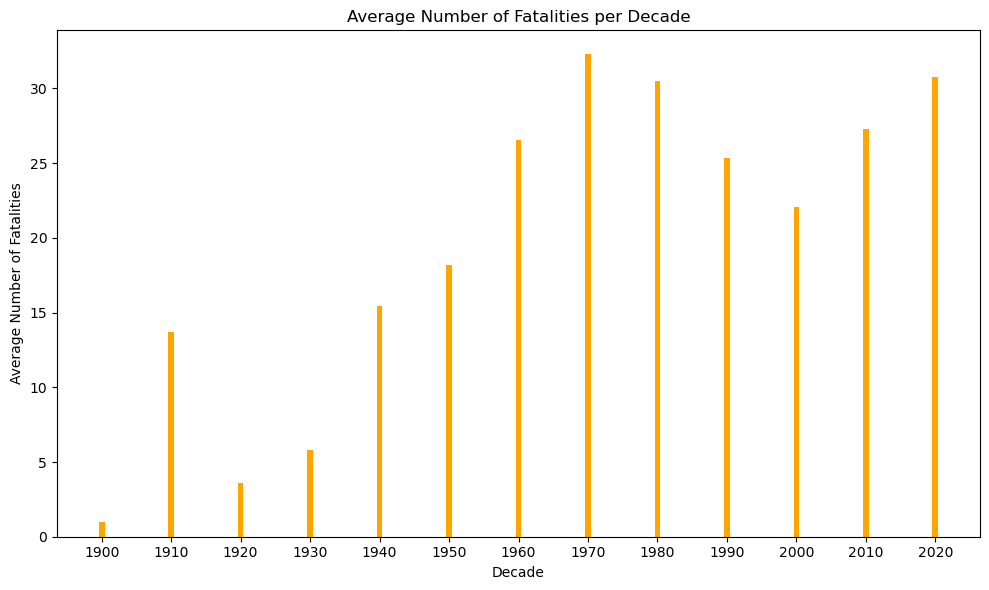

In [11]:
avg_fatalities_per_decade = data_cleaned.groupby('Decade')['Fatalities'].mean()

plt.figure(figsize=(10, 6))
plt.bar(avg_fatalities_per_decade.index, avg_fatalities_per_decade.values, color='orange')
plt.xlabel('Decade')
plt.ylabel('Average Number of Fatalities')
plt.title('Average Number of Fatalities per Decade')
plt.xticks(avg_fatalities_per_decade.index)
plt.tight_layout()
plt.show()


# <a id='toc4_'></a>[Conclusion](#toc0_)

1. Total Crashes and Fatalities:
- The dataset contains 4,998 recorded crashes with a total of 111,732 fatalities and 155,644 total aboard (passengers and crew).
- The survival rate across all crashes is approximately 28.21%, indicating that the majority of crashes resulted in fatalities.
2. Crashes Over Time:
- The number of crashes and fatalities have fluctuated significantly over the decades, showing clear peaks during key historical periods such as the world wars and periods of intense commercial aviation growth.
- In the early 1900s, aviation was in its infancy, with relatively few crashes and fatalities. However, the mid-20th century saw significant spikes, particularly during and after World War II, Korean War, and Vietnam War.
3. Statistical Analysis:
- The ANOVA test revealed a significant difference in the average number of fatalities across different decades, indicating that some decades were much more dangerous than others in terms of air travel.
4. Operator-Based Analysis:
- Aeroflot, a Russian airline, had the highest number of fatalities (8,858), followed by Military - U.S. Air Force (3,356), reflecting the risks associated with both commercial and military aviation in certain periods.
- Other major operators with significant fatalities include Air France, American Airlines, and United Air Lines, which highlights the role of large international carriers in global aviation incidents.
6. Aircraft Types:
- The Douglas DC-3 was involved in the highest number of crashes and fatalities, followed by other historically significant aircraft like the Douglas C-47 and Antonov AN-26.
- These aircraft, used extensively in both military and commercial operations, show the impact of early aviation models in crash statistics.
7. Military vs Commercial Comparison:
- Commercial aviation has experienced more crashes (4,217) and fatalities (90,928) than military aviation (781 crashes, 20,804 fatalities), but military crashes tend to result in higher fatalities per crash.
- This indicates that while commercial aviation incidents are more frequent due to the volume of flights, military crashes, often linked to specific war periods or conflicts, tend to be more severe.
8. World Wars and Conflict Periods:
- World War II was particularly deadly for aviation, with military operations contributing heavily to the fatality count.
- Post-WWII, the number of commercial crashes increased significantly, reflecting the global expansion of air travel.